## HW1 - Basics of ML
Include your code in the relevant cells below.
Subparts labeled as questions (Q1.1, Q1.2, etc.) should have their answers filled in or plots placed prominently, as appropriate.

#### Important notes: 

1. On this and future homeworks, depending on the data size and your hardware configuration, experiments may take too long if you use the complete dataset. This may be challenging, as you may need to run multiple experiments. So, if an experiment takes too much time, start first with a smaller sample that will allow you to run your code within a reasonable time. Once you complete all tasks, before the final submission, you can allow longer run times and run your code with the complete set. However, if this is still taking too much time or causing your computer to freeze, it will be OK to submit experiments using a sample size that is feasible for your setting (indicate it clearly in your submission). Grading of the homework will not be affected from this type of variations in the design of your experiments.


2. You can switch between 2D image data and 1D vector data using the numpy functions flatten() and resize()

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

### S1: Understanding the data
- Load MNIST dataset (hint it's available as part of https://keras.io/api/datasets)


Q1.1: What is the number of features in the training dataset:   784

Q1.2: What is the number of samples in the training dataset:  60,000

Q1.1: What is the number of features in the testing dataset:   784

Q1.4: What is the number of samples in the testing dataset:   10,000

Q1.3: What is the dimensionality of each data sample: 2-dimensional

In [13]:
keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

(60000, 28, 28)

### S2: Viewing the data
- Select one random example from each category from the training set. Display the 2D image with the name of the category

Q2.1: Visualize the example image:   ___

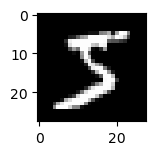

In [21]:
plt.subplot(330 + 1 + 1)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.show()

### S3: Sub-sampling the data
- Reduce training and testing sample sizes by **randomly selecting** %10 of the initial samples

Q3.1: What is the distribution of each label in the initial train data (i.e. percentage of each label):   ___

Q3.2: What is the distribution of each label in the reduced train data:   ___

### S4: Sub-sampling the data (again)
- Reduce training and testing sample sizes by selecting **the first** %10 of the initial samples

Q4.1: What is the distribution of each label in the initial train data (i.e. percentage of each label):   ___

Q4.2: What is the distribution of each label in the reduced train data:   ___

Q4.3: What are your comments/interpretation on comparison of the results for S3 and S4

#### ! For the rest of the HW, please discard sub-sampled data from S3 and use subsampled data from S4

### S5: Exploring the dataset
- Select all **train** images in category "3". Create and display a single pixel-wise "average image" for this category.
- Create and display a single pixel-wise "standard deviation image" for this category?
- Repeat the items above for category "3" images in the **test** set. Compare the average and standard deviation images.
- Repeat the items above for a different category you select.

Q5.1: Plot the 2D mean and std images for category 3 in training and testing sets:   ___

Q5.2: Plot the 2D mean and std images for the category you selected in training and testing sets:   ___

Q5.3: Comment on differences between the mean and std images from training and testing datasets? ___

### S6: Image distances
- In the training set, find the image in category 3 that is most dissimilar to the mean image of category 3. Show it as a 2D image
- In the training set, find the image in category 3 that is most similar to mean image of category 3. Show it as a 2D image
- In the training set, find the image in category 9 that is most similar to mean image of category 3. Show it as a 2D image

**Hint:** You can use the "euclidean distance" as your similarity metric. Given that an image i is represented with a flattened feature vector v_i , and the second image j with v_m, the distance between these two images can be calculated using the vector norm of their differences ( | v_i - v_j | ) 

Q6.1: What is the index of most dissimilar image in category 3:   ___

Q6.2: Plot the most dissimilar category 3 image in 2D:   ___

Q6.3: Plot the most similar category 3 image in 2D:   ___

### S7: Image distances, part 2
- Repeat questions S3 and S4 after binarizing the images first

Q7.1: What is the index of most dis-similar category 3 image:   ___

Q7.2: What is the index of most similar category 3 image:   ___

Q7.3: Did the answer change after binarization? How do you interprete this finding?:   ___

### S8: Binary classification between category 3 and 9  (split train data)
- Select images from these two categories in the training dataset
- Split them into two sets (Set1, Set2) with a %60 and %40 random split
- Replace category labels as 0 (for 3) and 1 (for 9)
- Use Set1 to train a linear SVM classifier with default parameters and predict the class labels for Set2 
- Use Set2 to train a linear SVM classifier with default parameters and predict the class labels for Set1 

Q8.1: What is the prediction accuracy using the model trained on Set1:   ___

Q8.2: What is the prediction accuracy using the model trained on Set2:   ___

### S9: Binary classification between category 3 and 9 (train + test sets)
- Select images from these two categories in the training and testing datasets
- Replace category labels as 0 (for 3) and 1 (for 9)
- Use training set to train a linear SVM classifier with default parameters and predict the class labels for the testing set
- Use testing set to train a linear SVM classifier with default parameters and predict the class labels for the training set

Q9.1: What is the prediction accuracy using the model trained on the training set:   ___

Q9.2: What is the prediction accuracy using the model trained on the testing set:   ___

### S10: k-NN Error Analysis
- In training and testing datasets select the images in categories: 1, 3, 5, 7 or 9
- Train k-NN classifiers using 4 to 40 nearest neighbors with a step size of 4
- Calculate and plot overall testing accuracy for each experiment

Q10.1: For k=4 what is the label that was predicted with lowest accuracy:   ___

Q10.2: For k=20 what is the label that was predicted with lowest accuracy:   ___

Q10.3: What is the label pair that was confused most often (i.e. class A is labeled as B, and vice versa):   ___

Q10.4: Visualize 5 mislabeled samples with their actual and predicted labels

### S11: Feature extraction

- We describe each image by using a reduced set of features (compared to n=784 initial features for each pixel value) as follows:
  
  1. Binarize the image (background=0, foreground=1)

  2. For each image row i, find n_i, the sum of 1's in the row (28 features) 
  
  3. For each image column j, find n_j, the sum of 1's in the column (28 features)
  
  4. Concatenate these features into a feature vector of 56 features
  
Repeat classification experiments in S9 using this reduced feature set.

Q11.1: What is the prediction accuracy using the model trained using the train data:   ___

Q11.2: What is the prediction accuracy using the model trained using the test data:   ___


### Bonus:

- This time we describe each 28 x 28 image by using a different feature set (n = 28 x 4 features). This feature set encodes "index of the first non-zero pixel in image columns or rows" from each direction (from left, right, top, bottom)

Example for a 6 x 6 image:

Img:
 0 0 0 0 0 0
 0 0 0 1 0 0
 0 0 0 1 0 0
 0 0 0 1 0 0
 0 0 0 1 0 0
 0 0 0 0 0 0
 
Extracted features:
 0 3 3 3 3 0  0 2 2 2 2 0  0 0 0 1 0 0  0 0 0 1 0 0   (left, right, top, bottom)
  
Repeat classification experiments in S9 using this reduced feature set.

Q11.1: What is the prediction accuracy using the model trained using the train data:   ___

Q11.2: What is the prediction accuracy using the model trained using the test data:   ___
